In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 47.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 38.4 MB/s eta 0:00:00


In [ ]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
Receiving objects: 100% (138/138), 1.72 MiB | 9.76 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-08-28 16:54:06--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22cd:e0db
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz?response-content-disposition=attachment%3B%20fi

In [ ]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
#[출처] NameError: name 'Tagger' is not defined (부제: 왜 갑자기 잘되던 Mecab이 안되는 걸까?)|작성자 존이

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 5.6 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1231 sha256=9bd9efedd86fe5df69d2233c809e548e5351299e55194092a11a79d12b113498
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.


In [ ]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 98.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
tensorflow 2.12.0 

여기까지 실행 후 런타임 다시 실행 -> 코랩에서 MECAB 활용의 오류

필요한 것 Import

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

from konlpy.tag import Mecab
mecab = Mecab()
from tqdm import tqdm
import re
from gensim import corpora
import gensim
import pyLDAvis.gensim_models
from collections import Counter
import pandas as pd
import numpy as np
import re

import json
import warnings
import pyLDAvis.gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import time
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pexpect/popen_spawn.py:60: DeprecationWarning: setDaemon() is deprecated, set the daemon attribute instead
  self._read_thread.setDaemon(True)


Mounted at /content/drive


데이터 불러오기

In [ ]:
dataset_raw1 = pd.read_csv('/content/drive/MyDrive/논문준비/신한은.csv',encoding='cp949')
dataset_raw2 = pd.read_csv('/content/drive/MyDrive/논문준비/hana.csv',encoding='cp949')
dataset_raw3 = pd.read_csv('/content/drive/MyDrive/논문준비/kookmin.csv',encoding='cp949')
dataset_raw4 = pd.read_csv('/content/drive/MyDrive/논문준비/wori.csv',encoding='cp949')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs = [dataset_raw1, dataset_raw2, dataset_raw3,dataset_raw4]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dfs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[     Unnamed: 0  Application_No Application_Date  Applicant Legal_State  \
 0             0    1.020080e+12       2008.01.24  주식회사 신한은행          등록   
 1             1    1.020070e+12       2007.06.05  주식회사 신한은행          등록   
 2             2    1.020070e+12       2007.04.17  주식회사 신한은행          등록   
 3             3    1.020060e+12       2006.10.23  주식회사 신한은행          등록   
 4             4    1.020110e+12       2011.11.16  주식회사 신한은행          등록   
 ..          ...             ...              ...        ...         ...   
 347         347    1.020030e+12       2003.11.19  주식회사 신한은행          거절   
 348         348    1.020030e+12       2003.11.07  주식회사 신한은행          거절   
 349         349    1.020020e+12       2002.09.23  주식회사 신한은행          거절   
 350         350    1.020000e+12       2000.10.12  주식회사 신한은행          거절   
 351         351    1.020000e+12       2000.06.19  주식회사 신한은행          거절   
 
                                PatentName_Kor  \
 0    영업점별 외화시재 자동 관리방법 및 시스템과 이를 위한

불러온 것 합치기

In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw['Application_Date'] = pd.to_datetime(dataset_raw['Application_Date'], format='%Y.%m.%d')

df_after_2014 = dataset_raw[dataset_raw['Application_Date'].dt.year >= 2014]

print(df_after_2014)

     Unnamed: 0  Application_No Application_Date  \
45           45    1.020150e+12       2015-09-25   
52           52    1.020140e+12       2014-12-30   
53           53    1.020150e+12       2015-04-23   
72           72    1.020140e+12       2014-05-21   
99           99    1.020200e+12       2020-06-22   
..          ...             ...              ...   
170         170    1.020210e+12       2021-08-27   
171         171    1.020210e+12       2021-02-25   
172         172    1.020210e+12       2021-08-30   
173         173    1.020210e+12       2021-06-16   
174         174    1.020210e+12       2021-06-16   

                                             Applicant Legal_State  \
45                                           주식회사 신한은행          등록   
52                                           주식회사 신한은행          등록   
53                                           주식회사 신한은행          등록   
72                                           주식회사 신한은행          등록   
99   신한카드 주식회사\n주식회사 신한은행

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_pos = df_after_2014['Summary_Text']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw = pd.concat(dfs)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
dataset_raw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,Application_No,Application_Date,Applicant,Legal_State,PatentName_Kor,PatentName_Eng,IPC,CPC,Applicant_Count,Applicant_Nationality_Count,Inventor_Count,Inventor_Nationality_Count,Claim_Count,Family_Count,Expiration_Date,Summary_Text,Claim_Text
0,0,1.020080e+12,2008.01.24,주식회사 신한은행,등록,영업점별 외화시재 자동 관리방법 및 시스템과 이를 위한 프로그램 기록매체,System and Method for Auto-managing Ready Fore...,G06Q 40/04(2023.01.01) G06Q 40/02(2023.01.01),G06Q 40/04(2023.01) G06Q 40/02(2023.01),1,1,1,1,3,0,NaN,본 발명은 영업점별 외화시재 자동 관리방법 및 시스템과 이를 위한 프로그램 기록매체...,각 영업점 단말과 통신 연결되어 금융사의 본점에 구비된 서버의 각 영업점 별 외화시...
1,1,1.020070e+12,2007.06.05,주식회사 신한은행,등록,가상계좌 운용방법,Method for Managing Virtual Account,G06Q 40/02(2023.01.01) G06Q 20/22(2012.01.01)...,G06Q 40/02(2023.01) G06Q 20/227(2020.05) G06Q...,1,1,7,1,1,2,NaN,본 발명은 가상계좌 운용방법 및 시스템과 이를 위한 프로그램 기록매체에 관한 것으로...,"정보 등록수단에서 단말로부터 무역거래 기업고객정보, 무역거래정보, 계좌정보, 무역거..."
2,2,1.020070e+12,2007.04.17,주식회사 신한은행,등록,온라인 계좌에 대한 실시간 자금 처리 시스템,System for Real-time Processing Funds about On...,G06Q 40/02(2023.01.01) G06Q 20/10(2012.01.01)...,G06Q 40/03(2023.01) G06Q 20/108(2013.01) G06Q...,1,1,1,1,1,1,NaN,본 발명은 온라인 계좌에 대한 실시간 자금 처리 방법 및 시스템과 이를 위한 기록매...,"소정의 실계좌와 연계된 가상계좌 형태의 온라인 계좌에 대한 금융거래 처리시, 상기 ..."
3,3,1.020060e+12,2006.10.23,주식회사 신한은행,등록,게임사(또는 게임 퍼블리싱사) 신용등급 평가 방법과 신용등급 평가 서버,Method for Evaluating Credit Rating of Game Co...,G06Q 40/02(2023.01.01),G06Q 40/02(2023.01),1,1,1,1,5,0,NaN,본 발명은 게임사(또는 게임 퍼블리싱사) 신용등급 평가 방법과 신용등급 평가 엔진에...,서버에서 관리자 단말로부터 신용등급 평가대상 게임사(또는 게임 퍼블리싱사)에서 운용...
4,4,1.020110e+12,2011.11.16,주식회사 신한은행,등록,금융 서버 및 금융 서비스 방법,FINANCIAL SERVER AND FINANCIAL SERVICE METHOD,G06Q 40/02(2023.01.01),G06Q 40/02(2023.01),1,1,2,1,17,0,NaN,"금융 서버는 고객의 저축성 예금의 평균잔액을 산출하는 저축성 예금 관리부, 상기 저...",고객의 저축성 예금의 평균잔액을 산출하는 저축성 예금 관리부;상기 저축성 예금과 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,170,1.020210e+12,2021.08.27,주식회사 우리은행,공개,주주총회 의결권 행사를 위한 의결권 위임 관리 방법 및 장치,Method and Appratus for Managing Delegated Vot...,G06Q 10/06(2012.01.01),G06Q 10/063112(2013.01) G06Q 40/04(2023.01) G...,1,1,5,1,12,0,NaN,본 명세서는 주주총회 의결권 행사를 위한 의결권 위임 관리 방법 및 장치에 관한 것...,주식을 발행한 주식회사의 주주총회에 대한 주주총회 개최 정보를 획득하는 단계;상기...
171,171,1.020210e+12,2021.02.25,주식회사 우리은행,공개,자녀 계좌 조회 방법,METHOD FOR INQUIRING BANK ACCOUNT OF CHILDREN,G06Q 40/02(2023.01.01),G06Q 40/02(2023.01),1,1,3,1,9,0,NaN,본 발명의 일 실시예에 따른 자녀 계좌 조회 방법은 신청인 단말로부터 피신청인 정보...,신청인 단말로부터 피신청인 정보를 수신하는 단계;상기 신청인 단말로부터 신청인의 ...
172,172,1.020210e+12,2021.08.30,주식회사 우리은행,공개,비접촉식 금융 자동화 기기 제어 서비스 제공 방법 및 장치,METHOD AND APPARATUS FOR PROVIDING CONTACTLESS...,G06Q 20/10(2012.01.01) G07F 19/00(2006.01.01)...,G06Q 20/1085(2013.01) G07F 19/211(2013.01) G0...,1,1,5,1,10,0,NaN,본 명세서는 비접촉식 금융 자동화 기기 제어 서비스 제공 방법 및 장치에 관한 것이...,사용자 단말로부터 금융 자동화 기기에 대한 미러링 요청을 수신하는 단계;상기 사용...
173,173,1.020210e+12,2021.06.16,주식회사 우리은행,공개,목표 금액 적립 서비스의 제공 방법,METHOD OF PROVIDING TARGET MONEY ACCUMULATION ...,G06Q 40/02(2023.01.01) G06Q 40/06(2023.01.01),G06Q 40/02(2023.01) G06Q 40/06(2023.01),1,1,4,1,8,0,NaN,본 발명의 일 실시예에 따른 목표 금액 적립 서비스의 제공 방법은 사용자 단말을 통...,"금융사 서버에 의해 수행되는 목표 금액 적립 서비스의 제공 방법에 있어서,사용자 ..."


불용어 리스트 불러오기

In [ ]:
stopword_list = pd.read_excel('/content/drive/MyDrive/논문준비/stopword.xlsx')
stopword_list.tail()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
1090,정보
1091,제공
1092,연계
1093,저장
1094,처리


In [ ]:
stopword_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stopword
0,가까스로
1,가량
2,가령
3,가민
4,가민커넥트
...,...
1090,정보
1091,제공
1092,연계
1093,저장


In [ ]:
Patent_tokenized_pos = list(map(lambda patent: mecab.nouns(patent), Patent_pos))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
documents  = list(Patent_pos)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

documents_as_strings = [' '.join(doc) for doc in Patent_tokenized_pos]

tfidf_vectorizer = TfidfVectorizer()

tfidf_matrix = tfidf_vectorizer.fit_transform(documents_as_strings)

words = tfidf_vectorizer.get_feature_names_out()

tfidf_matrix_array = tfidf_matrix.toarray()

threshold = 0.1

stop_words = []

for i, word in enumerate(words):
    tfidf_values = tfidf_matrix_array[:, i]
    if all(tfidf_value < threshold for tfidf_value in tfidf_values):
        stop_words.append(word)

print(f"설정한 임계값 {threshold} 이하인 불용어 목록:")
print(stop_words)

설정한 임계값 0.1 이하인 불용어 목록:
['가운데', '가정', '간판', '감소', '강화', '개부', '개최', '거래소', '거래자', '거리', '거부', '거주자', '검사', '검토', '게시', '경쟁력', '경험', '계수', '계약자', '계층', '고려', '고위험', '고정', '고정식', '공송', '공제조합', '교환', '교회', '구동', '구분', '구비', '구조', '구축', '귀속', '근거', '기본', '기성', '기존', '낙찰', '내벽', '내화', '농어촌', '능력', '다운로드', '다음', '대외', '대체', '대표자', '데이터베이스화', '도시', '도약정', '도움', '돌출', '동시', '동종', '드래그', '때문', '러닝', '리두', '리뷰', '매개', '매도', '매매', '머신', '멀티', '메모', '메일', '명부', '명의', '모델링', '모집', '모집인', '모형', '무선', '물자동차', '미래', '밑판', '바이러스', '반경', '반영', '발명', '발송', '방해', '배분', '번호표', '법정', '변동성', '변화', '별도', '병목현상', '보완', '보유자', '보장', '복구', '부족', '분야', '분쟁', '불편', '브랜드', '사설', '사실', '사업주', '사용료', '사자', '사회', '삭제', '산금', '산업', '상가', '상관', '상응', '상전', '상환', '세부', '소상', '소속', '소유자', '소프트웨어', '속도', '속성', '송료', '수도', '수립', '수요', '수익금', '수입자', '수정', '수지', '스크롤', '스크린', '시작', '시장', '시행', '식부', '신뢰도', '신속', '신용도', '실물', '실수', '실장', '심탐', '악성', '안건', '안전', '알고리즘', '약정서', '어드레스', '어려움', '언어', '업데이트', '업로드', '에폭시', '영사', '영

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
s = ['단계', '정보', '제공', '연계', '저장', '처리', '상기', '리부', '매체', '선택', '항목', '출력', '장치', '디지털', '플랫', '이력']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words.extend(s)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
stop_words_df = pd.DataFrame({'stopword': stop_words})

stopword_list = pd.concat([stopword_list, stop_words_df], ignore_index=True)

print(stopword_list)

     stopword
0        가까스로
1          가량
2          가령
3          가민
4       가민커넥트
...       ...
1408       출력
1409       장치
1410      디지털
1411       플랫
1412       이력

[1413 rows x 1 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


함수들 선언, 불용어, Topicmodeling...

In [ ]:
def remove_stopword(tokens):
    Patent_removed_stopword = []
    for token in tokens:
        if 1 < len(token):
            if token not in list(stopword_list['stopword']):
                Patent_removed_stopword.append(token)

    return Patent_removed_stopword
def lda_modeling(Patent_prep):
    dictionary = corpora.Dictionary(Patent_prep)
    corpus = [dictionary.doc2bow(Patent) for Patent in Patent_prep]
    model = gensim.models.ldamodel.LdaModel(corpus,
                                            num_topics = NUM_TOPICS,
                                            id2word = dictionary,
                                            passes = PASSES,
                                            iterations= ITER)
    return model, corpus, dictionary

def print_topic_prop(topics, RATING):
    topic_values = []
    for topic in topics:
        topic_value = topic[1]
        topic_values.append(topic_value)
    topic_prop = pd.DataFrame({"topic_num" : list(range(1, NUM_TOPICS + 1)), "word_prop": topic_values})
    topic_prop.to_excel('topic_prop.xlsx', index=True)

    display(topic_prop)

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    result_visualized = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.display(result_visualized)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def remove_stopword(tokens):
    Patent_stopword = []
    for token in tokens:
        if 1 < len(token):
            if token not in list(stopword_list['stopword']):
                Patent_stopword.append(token)

    return Patent_stopword

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
ITER = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_removed_stopword_pos = list(map(lambda tokens : remove_stopword(tokens), Patent_tokenized_pos))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

word_to_combine = '영업점'

combined_tokens = []

for sublist in Patent_removed_stopword_pos:
    i = 0
    combined_sublist = []
    while i < len(sublist):
        if i < len(sublist) - 1 and sublist[i] == '영업' and sublist[i + 1] == '점':
            combined_sublist.append(word_to_combine)
            i += 2
        else:
            combined_sublist.append(sublist[i])
            i += 1
    combined_tokens.append(combined_sublist)

for sublist in combined_tokens:
    print(sublist)


['서버', '계좌', '일괄', '개설', '개시', '개시', '계좌', '개설', '등록', '주기', '복수', '계좌', '신규', '개설', '계좌', '일괄', '개설', '가입', '신청', '가입', '신청', '복수', '계좌', '결정', '주기', '신규', '개설', '예약', '신규', '생성', '예약', '신규', '복수', '계좌', '계좌', '개설', '계좌', '결정', '자금', '출금', '계좌', '입금', '예약', '신규', '주기', '복수', '계좌', '계좌', '신규', '개설']
['모바일', '디바이스', '컴퓨터', '설치', '타국', '뱅킹', '서버', '사업자', '서버', '등록', '국제', '사업자', '서버', '커뮤니케이션', '서버', '가상', '계좌', '서버', '서버', '가상', '계좌', '개설', '수신', '채팅', '메시지', '환전', '판독', '서버', '가상', '계좌', '예치', '통화', '원금', '환전', '통화', '환전', '가상', '계좌', '이체']
['자동', '기기', '모니터링', '자동', '기기', '모니터링', '자동', '기기', '연동', '거래', '진행', '거래', '거래', '내역', '거래', '기록', '거래', '자동', '기기', '현금', '방출', '수납', '내역', '기기', '동작', '자동', '기기', '수집', '거래', '기기', '동작', '비교', '자동', '기기', '정상', '동작', '검출', '모니터링']
['기기', '거래', '서버', '기기', '거래', '기기', '다양', '센서', '패턴', '공인', '증서', '계좌', '비번', '보안', '비밀', '사이', '패턴', '신호', '패턴', '신호', '검증', '비밀', '인증', '피싱', '미싱', '유출', '사고', '예방']
['그룹', '회사', '지주', '회사', '사용자', '등급', '결정', '지주',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_removed_stopword_pos = combined_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_prep_pos = Patent_removed_stopword_pos

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
Patent_num_pos = len(Patent_prep_pos)


print(f"분석한 특허 총 개수: {Patent_num_pos}")


분석한 특허 총 개수: 215


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts = Patent_prep_pos
dictionary = Dictionary(texts)

corpus = [dictionary.doc2bow(text) for text in texts]
texts = Patent_prep_pos


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


최적의 토픽수 및 단어수 설정

In [ ]:
from gensim.models import CoherenceModel

def compute_coherence_values(corpus, dictionary, texts, num_topics, num_words):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, passes=1000,iterations=1000)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model.get_coherence()
    return coherence

num_topics_range = [5, 10, 15,20,25]
num_words_range = [5, 10, 15]

coherence_scores = []

for num_topics in num_topics_range:
    for num_words in num_words_range:

        coherence = compute_coherence_values(corpus, dictionary, texts, num_topics=num_topics, num_words=num_words)
        coherence_scores.append((num_topics, num_words, coherence))


for num_topics, num_words, coherence in coherence_scores:
    print(f"Number of Topics: {num_topics}, Number of Words: {num_words}, Coherence Score: {coherence}")


x = range(start, limit, step)
plt.plot(x, coherence_scores)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score by Number of Topics")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Number of Topics: 5, Number of Words: 5, Coherence Score: 0.3787285007131973
Number of Topics: 5, Number of Words: 10, Coherence Score: 0.36498693697506013
Number of Topics: 5, Number of Words: 15, Coherence Score: 0.35203291804372905
Number of Topics: 10, Number of Words: 5, Coherence Score: 0.39958734102629917
Number of Topics: 10, Number of Words: 10, Coherence Score: 0.37513989514996493
Number of Topics: 10, Number of Words: 15, Coherence Score: 0.3877036658288014
Number of Topics: 15, Number of Words: 5, Coherence Score: 0.3913951880161163
Number of Topics: 15, Number of Words: 10, Coherence Score: 0.375520632221551
Number of Topics: 15, Number of Words: 15, Coherence Score: 0.41421065387171774
Number of Topics: 20, Number of Words: 5, Coherence Score: 0.4111534178765172
Number of Topics: 20, Number of Words: 10, Coherence Score: 0.38552180834021643
Number of Topics: 20, Number of Words: 15, Coherence Score: 0.4096606315097982
Number of Topics: 25, Number of Words: 5, Coherence Sc

NameError: ignored

In [ ]:
NUM_TOPICS = 15
PASSES = 1000

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
NUM_WORDS = 15

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
NUM_WORDS = 15


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
RATING = 'pos'
topics = model.print_topics(num_words = NUM_WORDS)
print_topic_prop(topics, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topic_num,word_prop
0,1,"0.122*""대출"" + 0.062*""사기"" + 0.041*""감사"" + 0.038*""..."
1,2,"0.053*""프로그램"" + 0.047*""대출"" + 0.042*""서버"" + 0.033..."
2,3,"0.103*""계좌"" + 0.039*""개설"" + 0.033*""송금"" + 0.030*""..."
3,4,"0.093*""블록체인"" + 0.037*""기반"" + 0.034*""컴퓨팅"" + 0.02..."
4,5,"0.040*""기기"" + 0.039*""자동"" + 0.035*""수신"" + 0.031*""..."
5,6,"0.057*""휴사"" + 0.038*""거래"" + 0.038*""회원"" + 0.030*""..."
6,7,"0.077*""결제"" + 0.040*""자산"" + 0.035*""수신"" + 0.032*""..."
7,8,"0.030*""서버"" + 0.028*""결제"" + 0.028*""속증"" + 0.026*""..."
8,9,"0.094*""인증"" + 0.042*""서버"" + 0.026*""거래"" + 0.024*""..."
9,10,"0.069*""계좌"" + 0.048*""입금"" + 0.048*""공동"" + 0.048*""..."


In [ ]:
lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.display import display, HTML

def lda_visualize(model, corpus, dictionary, RATING):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary)
    pyLDAvis.save_html(vis, 'lda_visualization.html')
    display(HTML('lda_visualization.html'))

lda_visualize(model, corpus, dictionary, RATING)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
model, corpus, dictionary = lda_modeling(Patent_prep_pos)
lda_visualize(model, corpus, dictionary, "all")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# 주어진 문서에 대한 토픽 분포 추출
def get_document_topic_distribution(model, corpus):
    topic_dist = []
    for doc in corpus:
        doc_topic_dist = [0] * model.num_topics
        topics = model[doc]
        for topic in topics:
            topic_idx = topic[0]
            topic_prob = topic[1]
            doc_topic_dist[topic_idx] = topic_prob
        topic_dist.append(doc_topic_dist)
    return topic_dist
lda_topic_dist = get_document_topic_distribution(model, corpus)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lda_topic_dist = get_document_topic_distribution(model, corpus)

print("Document Topic Distribution:")
for i, doc_topic_dist in enumerate(lda_topic_dist):
    print(f"Document {i+1}: {doc_topic_dist}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document Topic Distribution:
Document 1: [0, 0, 0.73692334, 0, 0.25128204]
Document 2: [0, 0, 0, 0, 0.96597457]
Document 3: [0, 0, 0.09701777, 0.50860727, 0.3861356]
Document 4: [0, 0.94475555, 0, 0.044393145, 0]
Document 5: [0.8901961, 0, 0, 0.09762981, 0]
Document 6: [0, 0, 0, 0, 0.9894236]
Document 7: [0, 0, 0.55770826, 0.098463096, 0.33726278]
Document 8: [0, 0.98857605, 0, 0, 0]
Document 9: [0, 0, 0.98398834, 0, 0]
Document 10: [0.9797088, 0, 0, 0, 0]
Document 11: [0, 0.16705345, 0.82123035, 0, 0]
Document 12: [0, 0, 0, 0, 0.9883592]
Document 13: [0, 0, 0.41689846, 0.14589259, 0.4324296]
Document 14: [0, 0, 0.95376545, 0, 0.039838903]
Document 15: [0.1452969, 0, 0.58100444, 0.26781887, 0]
Document 16: [0, 0, 0, 0.9920558, 0]
Document 17: [0, 0.020693064, 0, 0.9560764, 0.019751733]
Document 18: [0, 0, 0, 0, 0.98894507]
Document 19: [0, 0.37873888, 0, 0.09125098, 0.5236094]
Document 20: [0.681666, 0, 0, 0, 0.3104048]
Document 21: [0, 0.9817749, 0, 0, 0]
Document 22: [0, 0.90626997, 

In [ ]:
topics = {
    1: {
        "label": "1",
        "weights": {
            "대출": 0.122,
            "사기": 0.062,
            "감사": 0.041,
            "거래": 0.038,
            "예측": 0.030,
            "영업": 0.029,
            "전결": 0.026,
            "부실": 0.024,
            "기업": 0.022,
            "모델": 0.020,
            "가계": 0.018,
            "검증": 0.018,
            "신청": 0.017,
            "의심": 0.015,
            "학습": 0.015
        }
    },
    2: {
        "label": "2",
        "weights": {
            "프로그램": 0.053,
            "대출": 0.047,
            "서버": 0.042,
            "복수": 0.033,
            "거래": 0.024,
            "생성": 0.023,
            "사용자": 0.019,
            "포트폴리오": 0.016,
            "계좌": 0.016,
            "장애": 0.014,
            "점포": 0.014,
            "메시지": 0.014,
            "수신": 0.013,
            "급사": 0.012,
            "펀드": 0.012
        }
    },
    3: {
        "label": "3",
        "weights": {
            "계좌": 0.103,
            "개설": 0.039,
            "송금": 0.033,
            "서버": 0.030,
            "계정": 0.030,
            "가상": 0.026,
            "수신": 0.021,
            "위치": 0.020,
            "거래": 0.019,
            "인증": 0.018,
            "사업자": 0.017,
            "지급": 0.017,
            "입금": 0.016,
            "해외": 0.015,
            "외화": 0.014
        }
    },
    4: {
        "label": "4",
        "weights": {
            "블록체인": 0.093,
            "기반": 0.037,
            "컴퓨팅": 0.034,
            "영화": 0.028,
            "자산": 0.026,
            "수신": 0.026,
            "생성": 0.025,
            "플랫폼": 0.025,
            "여신": 0.022,
            "블록": 0.021,
            "거래": 0.019,
            "통장": 0.017,
            "원장": 0.016,
            "방지": 0.015,
            "계약": 0.015
        }
    },
    5: {
        "label": "5",
        "weights": {
            "기기": 0.040,
            "자동": 0.039,
            "수신": 0.035,
            "계약": 0.031,
            "거래": 0.031,
            "페이": 0.022,
            "더치": 0.022,
            "생성": 0.022,
            "패스": 0.020,
            "결제": 0.016,
            "자산": 0.016,
            "파일": 0.016,
            "전송": 0.014,
            "외국환": 0.014,
            "계약서": 0.014
        }
    },
    6: {
        "label": "6",
        "weights": {
            "휴사": 0.057,
            "거래": 0.038,
            "회원": 0.038,
            "코드": 0.030,
            "데이터베이스": 0.021,
            "수신": 0.021,
            "분석": 0.017,
            "통신": 0.016,
            "서버": 0.015,
            "이동": 0.014,
            "단축": 0.014,
            "통합": 0.014,
            "어플리케이션": 0.014,
            "식별": 0.013,
            "모듈": 0.013
        }
    },
    7: {
        "label": "7",
        "weights": {
            "결제": 0.077,
            "자산": 0.040,
            "수신": 0.035,
            "어플리케이션": 0.032,
            "블록체인": 0.027,
            "생성": 0.025,
            "전송": 0.024,
            "거래": 0.024,
            "메시지": 0.022,
            "기업": 0.022,
            "환전": 0.020,
            "복수": 0.019,
            "목록": 0.017,
            "과태료": 0.017,
            "서버": 0.015
        }
    },
    8: {
        "label": "8",
        "weights": {
            "서버": 0.030,
            "결제": 0.028,
            "속증": 0.028,
            "담보물": 0.026,
            "사용자": 0.023,
            "거래": 0.023,
            "해외": 0.022,
            "회사": 0.022,
            "텍스트": 0.022,
            "메시지": 0.021,
            "불만": 0.020,
            "계좌": 0.019,
            "출금": 0.018,
            "경매": 0.018,
            "음성": 0.017
        }
    },
    9: {
        "label": "9",
        "weights": {
            "인증": 0.094,
            "서버": 0.042,
            "거래": 0.026,
            "계좌": 0.024,
            "등록": 0.023,
            "증명서": 0.022,
            "비밀": 0.022,
            "송금인": 0.020,
            "이체": 0.020,
            "영역": 0.018,
            "필터": 0.016,
            "발급": 0.016,
            "화면": 0.014,
            "보험": 0.012,
            "이동": 0.012
        }
    },
    10: {
        "label": "10",
        "weights": {
            "계좌": 0.069,
            "입금": 0.048,
            "공동": 0.048,
            "자금": 0.048,
            "신탁": 0.034,
            "적금": 0.024,
            "운영": 0.022,
            "목표": 0.021,
            "서버": 0.018,
            "사용자": 0.017,
            "기업": 0.017,
            "펀드": 0.017,
            "지급": 0.017,
            "선불금": 0.014,
            "가입": 0.014
        }
    },
    11: {
        "label": "11",
        "weights": {
            "증권": 0.074,
            "출금": 0.024,
            "차입": 0.023,
            "화폐": 0.022,
            "서버": 0.021,
            "회원": 0.020,
            "영업": 0.018,
            "매물": 0.015,
            "대차": 0.015,
            "중개사": 0.013,
            "연결": 0.013,
            "수신": 0.012,
            "커뮤니티": 0.012,
            "표준": 0.012,
            "권리": 0.012
        }
    },
    12: {
        "label": "12",
        "weights": {
            "수익": 0.031,
            "보안": 0.027,
            "결재": 0.025,
            "전송": 0.023,
            "거래": 0.020,
            "신탁": 0.019,
            "수신": 0.017,
            "방출": 0.017,
            "토큰": 0.015,
            "현금": 0.015,
            "재산": 0.012,
            "지식": 0.012,
            "서버": 0.012,
            "직원": 0.012,
            "이동": 0.011
        }
    },
    13: {
        "label": "13",
        "weights": {
            "보안": 0.065,
            "기관": 0.063,
            "전송": 0.048,
            "수신": 0.045,
            "입금": 0.041,
            "서버": 0.037,
            "신청": 0.035,
            "고유": 0.031,
            "뱅킹": 0.023,
            "생성": 0.023,
            "거래": 0.022,
            "증빙": 0.020,
            "계좌": 0.020,
            "통행료": 0.018,
            "제휴": 0.018
        }
    },
    14: {
        "label": "14",
        "weights": {
            "부동산": 0.041,
            "기관": 0.034,
            "거래": 0.026,
            "수신": 0.026,
            "서버": 0.024,
            "사용자": 0.020,
            "인증": 0.019,
            "기업": 0.015,
            "수출": 0.014,
            "심사": 0.014,
            "콘텐츠": 0.014,
            "서류": 0.013,
            "암호": 0.012,
            "증표": 0.010,
            "컨텐츠": 0.010
        }
    },
    15: {
        "label": "15",
        "weights": {
            "인증": 0.104,
            "서버": 0.064,
            "이동": 0.026,
            "수신": 0.023,
            "기기": 0.022,
            "통신": 0.018,
            "생성": 0.018,
            "화면": 0.017,
            "뱅킹": 0.016,
            "충전": 0.015,
            "대화": 0.015,
            "로그인": 0.014,
            "인터페이스": 0.014,
            "선불카드": 0.013,
            "채팅": 0.013
        }
    }
}


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations


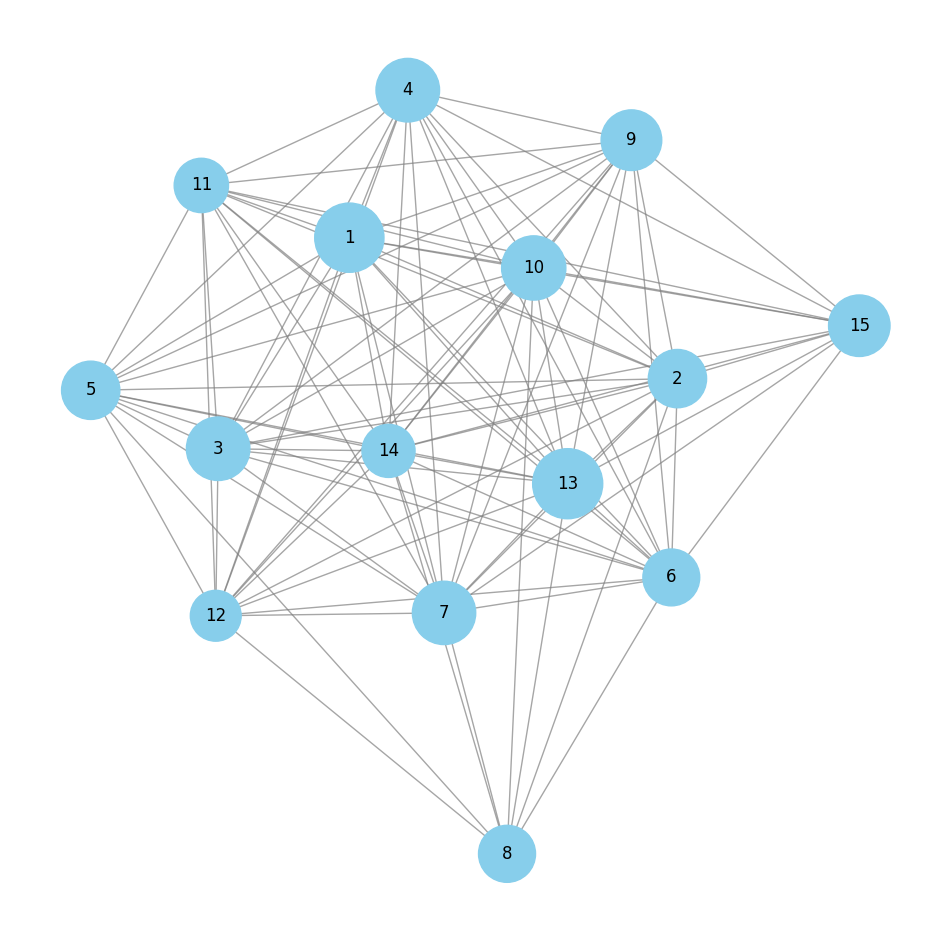

In [ ]:
import numpy as np
topic_relations = []
# 토픽 간의 모든 조합에 대해 유사성 측정
for topic1, topic2 in combinations(topics.keys(), 2):
    # 단어 가중치 추출
    weights1 = list(topics[topic1]["weights"].values())
    weights2 = list(topics[topic2]["weights"].values())

    # 코사인 유사도 계산
    dot_product = np.dot(weights1, weights2)
    norm1 = np.linalg.norm(weights1)
    norm2 = np.linalg.norm(weights2)

    cosine_similarity = dot_product / (norm1 * norm2)

    # 임계값 (예: 0.9) 이상인 경우에만 연결
    if cosine_similarity >= 0.9:
        topic_relations.append((topic1, topic2))
# 그래프 생성
G = nx.Graph()

# 노드 추가 및 연결 중심성 계산
node_sizes = []
for topic_id, topic_info in topics.items():
    G.add_node(topic_id, label=topic_info["label"])
    # 가중치 합을 통해 노드 크기 설정
    total_weight = sum(topic_info["weights"].values())
    node_sizes.append(total_weight * 5000)  # 크기를 더 크게 조절해보세요.

# 엣지 추가
G.add_edges_from(topic_relations)

# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
node_labels = nx.get_node_attributes(G, "label")  # 노드 라벨

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.show()

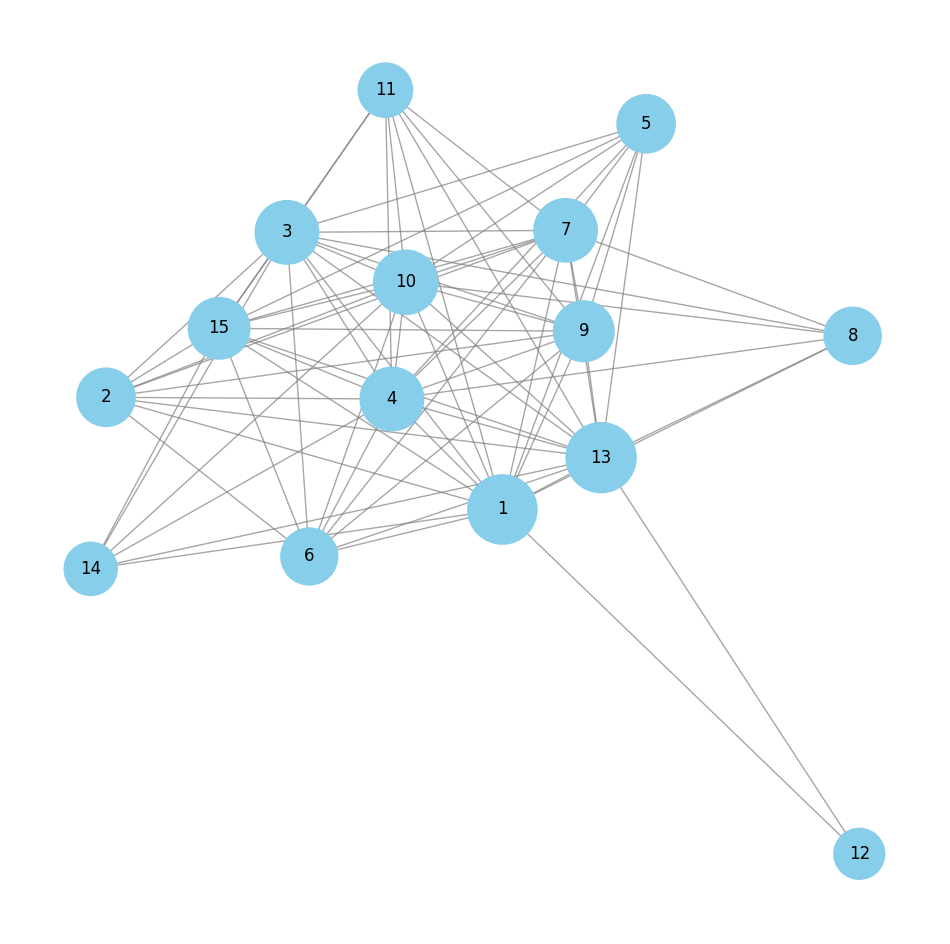

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations



# 토픽 간의 연관성을 측정하여 엣지 생성
topic_relations = []

# 토픽 간의 모든 조합에 대해 연관성 측정
for topic1, topic2 in combinations(topics.keys(), 2):
    # Jaccard 유사도 계산 (토픽 단어 가중치 간의 유사성 측정)
    weights1 = topics[topic1]["weights"]
    weights2 = topics[topic2]["weights"]

    # 두 토픽 간의 가중치 유사도 계산 (토픽 간의 연결 여부 결정)
    similarity = sum(w1 * w2 for w1, w2 in zip(weights1.values(), weights2.values()))

    # 임계값 (예: 0.1) 이상인 경우에만 연결
    if similarity >= 0.01:
        topic_relations.append((topic1, topic2))

# 그래프 생성
G = nx.Graph()

# 노드 추가 및 연결 중심성 계산
node_sizes = []
for topic_id, topic_info in topics.items():
    G.add_node(topic_id, label=topic_info["label"])
    # 가중치 합을 통해 노드 크기 설정
    total_weight = sum(topic_info["weights"].values())
    node_sizes.append(total_weight * 5000)  # 크기를 더 크게 조절해보세요.

# 엣지 추가
G.add_edges_from(topic_relations)

# 그래프 시각화
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정
node_labels = nx.get_node_attributes(G, "label")  # 노드 라벨

plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.show()


In [ ]:
import networkx as nx

try:
    # 네트워크를 GEXF 파일로 저장
    nx.write_gexf(G, "Traditional.gexf")
    print("네트워크 저장 완료")
except Exception as e:
    print(f"파일 저장 중 오류 발생: {str(e)}")


네트워크 저장 완료


In [ ]:
# Degree Centrality 계산
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality 계산
betweenness_centrality = nx.betweenness_centrality(G)

# 노드의 중요성을 기준으로 정렬
sorted_nodes_by_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
sorted_nodes_by_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# 가장 중요한 노드 출력
most_important_degree_node = sorted_nodes_by_degree[0]
most_important_betweenness_node = sorted_nodes_by_betweenness[0]

print(f"Degree Centrality가 가장 높은 노드: {most_important_degree_node}")
print(f"Betweenness Centrality가 가장 높은 노드: {most_important_betweenness_node}")


Degree Centrality가 가장 높은 노드: (2, 1.0)
Betweenness Centrality가 가장 높은 노드: (2, 0.010697635697635698)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import community  # python-louvain 라이브러리

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


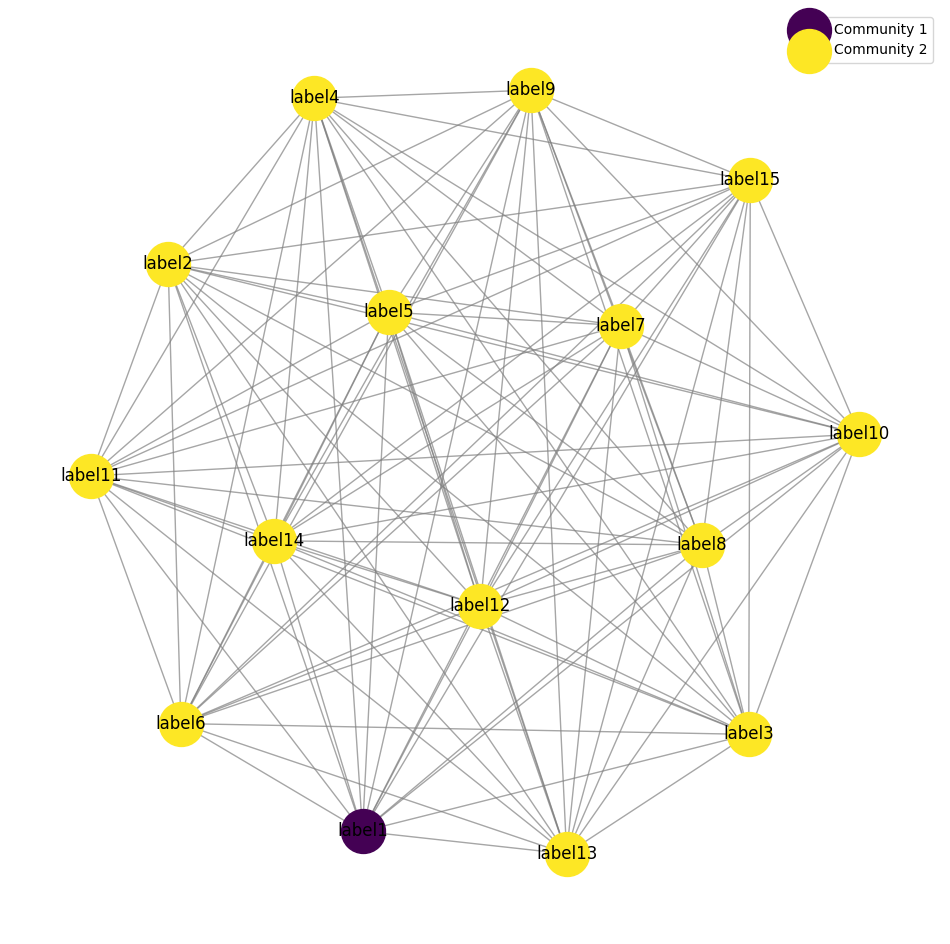

커뮤니티 정보:
커뮤니티 1: label1
커뮤니티 2: label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12, label13, label14, label15


In [ ]:


import networkx as nx
import matplotlib.pyplot as plt
import community

# 커뮤니티 탐지 (greedy_modularity 알고리즘 사용)
communities_generator = nx.algorithms.community.girvan_newman(G)
communities = next(communities_generator)

# 그래프 시각화 (커뮤니티별로 다른 색상 적용)
pos = nx.spring_layout(G)  # 그래프 레이아웃 설정

plt.figure(figsize=(12, 12))
cmap = plt.get_cmap('viridis', len(communities))
node_colors = [cmap(i) for i in range(len(communities))]

for i, com in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=list(com), node_color=node_colors[i], node_size=1000, label=f'Community {i+1}')

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black')
plt.axis('off')
plt.legend()
plt.show()

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, com in enumerate(communities):
    print(f"커뮤니티 {i+1}: {', '.join([node_labels[node] for node in com])}")



In [ ]:
# 각 커뮤니티의 크기 계산
community_sizes = [len(com) for com in communities]

# 가장 큰 커뮤니티 선택
most_influential_community_index = community_sizes.index(max(community_sizes))
most_influential_community = communities[most_influential_community_index]

# 가장 영향력 있는 커뮤니티 정보 출력
print(f"가장 영향력 있는 커뮤니티: Community {most_influential_community_index + 1}")
print(f"커뮤니티 크기: {len(most_influential_community)}")
print(f"커뮤니티 멤버: {', '.join([node_labels[node] for node in most_influential_community])}")


가장 영향력 있는 커뮤니티: Community 2
커뮤니티 크기: 14
커뮤니티 멤버: label2, label3, label4, label5, label6, label7, label8, label9, label10, label11, label12, label13, label14, label15


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install python-igraph


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 12.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


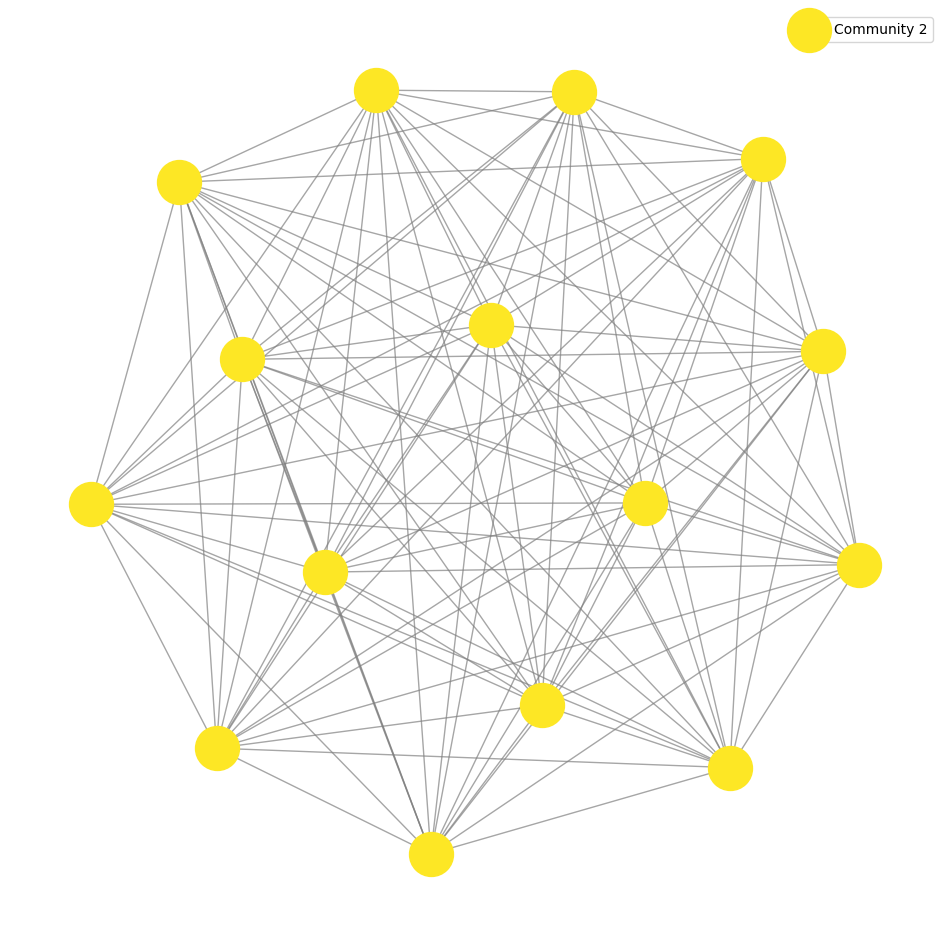

커뮤니티 정보:
커뮤니티 1: 0
커뮤니티 2: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# NetworkX 그래프 생성

# igraph 그래프로 변환
ig_graph = ig.Graph(len(G), list(G.edges()))

# Walktrap 알고리즘 적용
walktrap = ig_graph.community_walktrap()
clusters = walktrap.as_clustering()

# igraph의 결과를 NetworkX 그래프로 변환
cluster_membership = clusters.membership
cluster_dict = {}
for node, cluster_id in enumerate(cluster_membership):
    if cluster_id not in cluster_dict:
        cluster_dict[cluster_id] = []
    cluster_dict[cluster_id].append(node)

# 그래프 시각화
pos = nx.spring_layout(G)

plt.figure(figsize=(12, 12))
cmap = plt.get_cmap('viridis', len(cluster_dict))
node_colors = [cmap(i) for i in range(len(cluster_dict))]

for i, nodes in cluster_dict.items():
    subgraph = G.subgraph(nodes)
    nx.draw_networkx_nodes(subgraph, pos, node_color=node_colors[i], node_size=1000, label=f'Community {i+1}')

nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.7)
plt.axis('off')
plt.legend()
plt.show()

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, nodes in cluster_dict.items():
    print(f"커뮤니티 {i+1}: {', '.join([str(node) for node in nodes])}")


In [ ]:
import igraph as ig


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

# 그래프 생성 (이전 코드에서 생성한 그래프 사용)
# G = nx.Graph()

# Louvain 알고리즘을 사용하여 커뮤니티 검출
communities = list(community.label_propagation_communities(G))

# 커뮤니티 정보 출력
print("커뮤니티 정보:")
for i, com in enumerate(communities):
    com_str = ', '.join(map(str, com))  # 노드를 문자열로 변환
    print(f"커뮤니티 {i+1}: {com_str}")


커뮤니티 정보:
커뮤니티 1: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20


In [ ]:
import community
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from networkx.algorithms import community


def Girvan_Newman_algorithm(G, weight):
    """ G는 원래 네트워크 g는 Edge를 한개씩 끊어나갈 네트워크 """
    g = G.copy()

    """ initial """
    step = 0                # step
    log_step = []           # step 기록
    log_modularity = []     # modularity 기록
    old_max_m = 0           # 이전 최대 modularity 기억
    max_g = g.copy()        # modularity가 최대일 때의 네트워크 여기서는 초기화 작업
    k = sorted(nx.connected_components(G), key=len, reverse=True)   # k 는 모두 연결되어있는 Community를 노드로 나타낸 값
    k_list = []
    for j in range(len(k)):
        k_list = k_list + [list(k[j])]
    max_k = k_list  # max_k 는 modularity가 최대일 때의 k 값 저장용
    m = community.modularity(G, communities=k, weight=weight)   # modularity
    max_m = m       # max_m은 modularity가 최대일 때 값 기록용
    max_step = 0    # max_step은 modularity가 최대일 때 step값 기록용

    """ Girvan-Newman algorithm """
    while len(g.edges()) > 0:
        k = sorted(nx.connected_components(g), key=len, reverse=True)  # 커뮤니티 추출
        m = community.modularity(G, communities=k, weight=weight)   # 추출된 커뮤니티의 modularity 계산
        if m > old_max_m:   # 이전 최대 modularity보다 현재 modularity가 높을 경우 기록
            max_g = g.copy()
            max_m = m
            k_list = []
            for j in range(len(k)):
                k_list = k_list + [list(k[j])]
            max_k = k_list
            max_step = step
            old_max_m = m
        log_step = log_step + [step]    # 로깅용
        log_modularity = log_modularity + [m]   # 로깅용
        print("step: ", step, "  modularity: ", m)

        """ remove edge """
        step = step + 1
        betweenness = nx.edge_betweenness_centrality(g, weight=weight)  # betweennes centrality 계산
        max_edge = max(betweenness, key=betweenness.get)    # betweeness centrality가 가장 큰 Edge 선택
        g.remove_edge(max_edge[0], max_edge[1])     # Edge 추출

    return log_step, log_modularity, max_g, max_m, max_k, max_step


In [ ]:
log_step, log_modularity, max_g, max_m, max_k, max_step = Girvan_Newman_algorithm(G, weight=None)

step:  0   modularity:  0.0
step:  1   modularity:  0.0
step:  2   modularity:  0.0
step:  3   modularity:  0.0
step:  4   modularity:  0.0
step:  5   modularity:  0.0
step:  6   modularity:  0.0
step:  7   modularity:  0.0
step:  8   modularity:  0.0
step:  9   modularity:  0.0
step:  10   modularity:  0.0
step:  11   modularity:  0.0
step:  12   modularity:  0.0
step:  13   modularity:  0.0
step:  14   modularity:  -0.008888888888888918
step:  15   modularity:  -0.008888888888888918
step:  16   modularity:  -0.008888888888888918
step:  17   modularity:  -0.008888888888888918
step:  18   modularity:  -0.008888888888888918
step:  19   modularity:  -0.008888888888888918
step:  20   modularity:  -0.008888888888888918
step:  21   modularity:  -0.008888888888888918
step:  22   modularity:  -0.008888888888888918
step:  23   modularity:  -0.008888888888888918
step:  24   modularity:  -0.008888888888888918
step:  25   modularity:  -0.008888888888888918
step:  26   modularity:  -0.008888888888

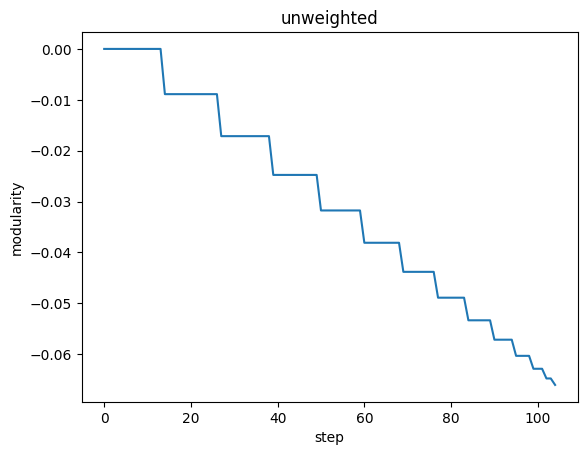

In [ ]:
fig = plt.figure()
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.plot(log_step, log_modularity)
plt.xlabel('step')
plt.ylabel('modularity')
plt.title("unweighted")
plt.show(block=False)